# Handling non linearly separable data(using high dimensions)

In [ ]:
from sklearn.datasets import make_circles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
X,Y = make_circles(n_samples=400,
                  shuffle=True,
                  noise=0.02,
                  random_state=3,
                  factor=0.8)

In [ ]:
print(X.shape)
print(Y.shape)

(400, 2)
(400,)


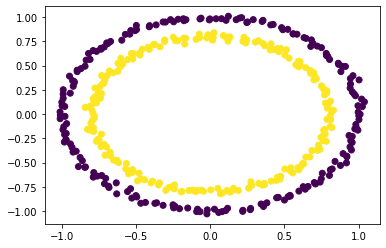

In [ ]:
plt.scatter(X[:,0], X[:, 1], c=Y);

## projecting the data into some high dimensional space

In [ ]:
def phi(X):
    """some non linear transformation"""
    X1 = X[:, 0]
    X2 = X[:, 1]
    X3 = X1**2 + X2**2
    X = np.hstack((X, X3.reshape(-1, 1)))
    return X

In [ ]:
X_new = phi(X)

In [ ]:
print(X_new.shape)

(400, 3)


In [ ]:
def plot3d(data, show=True):
    fig = plt.figure(figsize=(10,  10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[:, 0], data[:, 1], data[:, 2], zdir ='z', s=20, c=Y, depthshade=True)
    if show == True:
        plt.show()
    return ax

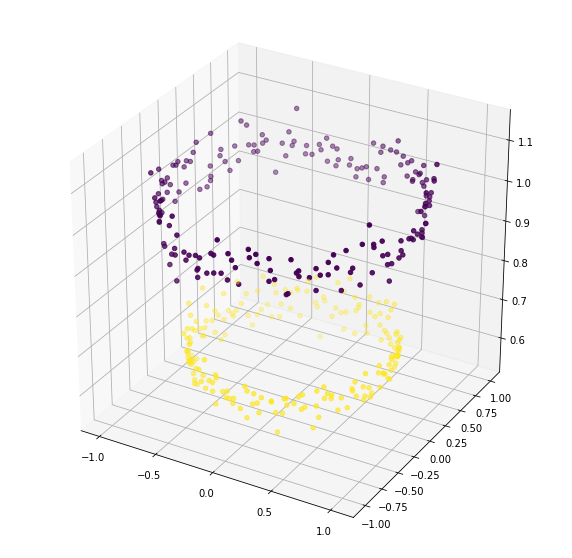

In [ ]:
plot3d(X_new)

## applying linear model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X, Y)

LogisticRegression()

In [ ]:
lr.score(X, Y)

0.5025

In [ ]:
lr1 = LogisticRegression()

In [ ]:
lr1.fit(X_new, Y)

LogisticRegression()

In [ ]:
lr1.score(X_new, Y)

1.0

In [ ]:
wts = lr1.coef_
bias = lr1.intercept_

In [ ]:
wts

array([[  0.03729048,   0.01699494, -10.00082232]])

In [ ]:
xx, yy = np.meshgrid(range(-2, 2), range(-2, 2))

In [ ]:
yy

array([[-2, -2, -2, -2],
       [-1, -1, -1, -1],
       [ 0,  0,  0,  0],
       [ 1,  1,  1,  1]])

In [ ]:
z = -(wts[0, 0]*xx + wts[0, 1]*yy + bias)/wts[0, 2]

In [ ]:
z

array([[0.81014035, 0.81386909, 0.81759783, 0.82132657],
       [0.8118397 , 0.81556844, 0.81929718, 0.82302593],
       [0.81353905, 0.8172678 , 0.82099654, 0.82472528],
       [0.81523841, 0.81896715, 0.82269589, 0.82642463]])

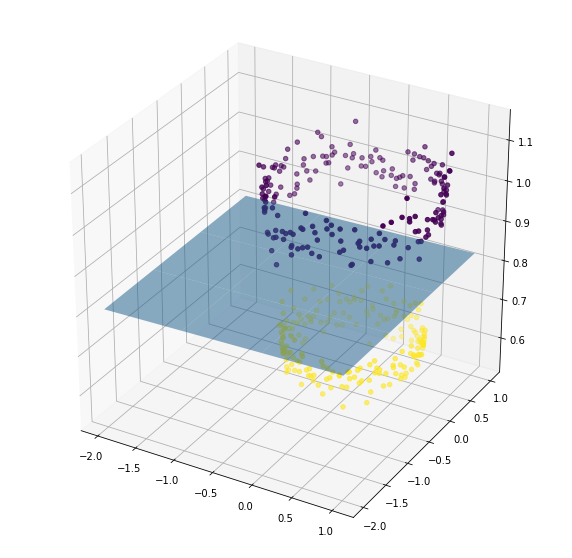

In [ ]:
ax = plot3d(X_new, False)
ax.plot_surface(xx, yy, z, alpha = 0.5);

In [ ]:
from sklearn import svm 

In [ ]:
ss=svm.SVC(kernel="linear")
ss.fit(X,Y)
ss.score(X,Y)

0.5025

In [ ]:
ss=svm.SVC(kernel="rbf")
ss.fit(X,Y)
ss.score(X,Y)

1.0